# Lesson 1: Calculation of NDVI

The **normalized difference vegetation index (NDVI)** is a simple graphical indicator that can be used to analyze remote sensing measurements, often from a space platform, assessing whether or not the target being observed contains live green vegetation.

The NDVI is calculated from these individual measurements as follows:

$NDVI=\frac{(NIR-Red)}{(NIR+Red)}$

where: 
Red = red band
NIR = near-infrared band

(See [Wikipedia](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index) )

In [35]:
#required libraries
import rasterio as rio #to handle raster data
from pathlib import Path #to point directory paths
import numpy as np #multi-dimensional array calculation
import matplotlib.pyplot as plt #plots, visualization

Based on [Sentinel-2A](https://sentinel.esa.int/web/sentinel/missions/sentinel-2) data.

In [36]:
#set the path to the folder containing Sentinel-2A images
filepathA = Path('..','Raster','S2A_MSIL2A_20200827T145731_N0214_R039_T19LCG_20200827T185210.SAFE',
                'GRANULE','L2A_T19LCG_A027063_20200827T150516','IMG_DATA','R10m')

#set the path to the folder containing Sentinel-2B images
filepathB = Path('..','Raster','S2B_MSIL2A_20181214T013039_N0211_R074_T54TWN_20181214T033721.SAFE',
                'GRANULE','L2A_T54TWN_A009252_20181214T013042','IMG_DATA','R10m')

# filepath = filepathA
filepath = filepathB


In [37]:
# Identifying bands
dictBands= {}
for fn in list(filepath.glob('*.jp2')):
    key= fn.stem[-7:-4]
    dictBands[key] = fn

In [38]:
# Loading NIR and RED bands
band_nir= rio.open(dictBands['B08']).read()
band_red= rio.open(dictBands['B04']).read()
tci=rio.open(dictBands['TCI']).read()

In [39]:
# Allow division by zero
np.seterr(divide='ignore', invalid='ignore')
# Calculate NDVI
ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)

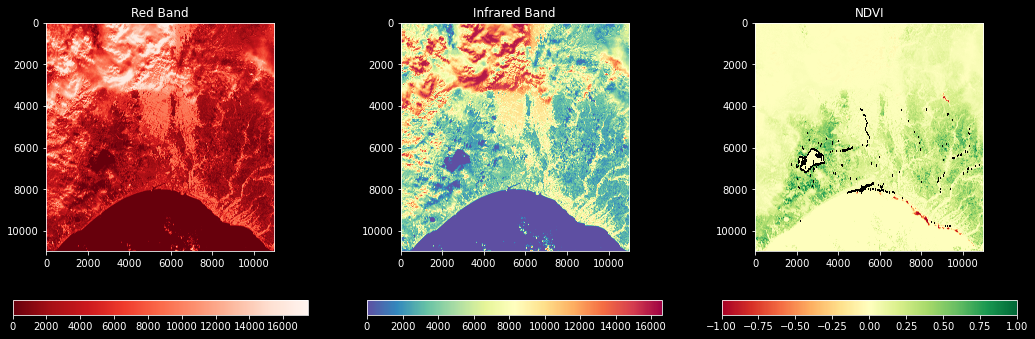

In [44]:
#plot images
fig,axs = plt.subplots(1,3,figsize=(18,6))
im0=axs[0].imshow(band_red[0],cmap='Reds_r')
axs[0].title.set_text('Red Band')
fig.colorbar(im0,ax=axs[0],location='bottom')

im1=axs[1].imshow(band_nir[0],cmap='Spectral_r')
axs[1].title.set_text('Infrared Band')
fig.colorbar(im1,ax=axs[1],location='bottom')

im2=axs[2].imshow(ndvi[0],vmin=-1,vmax=1,cmap='RdYlGn')
axs[2].title.set_text('NDVI')
fig.colorbar(im2,ax=axs[2],location='bottom');